In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import scikit models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#impport bagging, boosting, etc
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

#import pre processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#import evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

In [2]:
# Load the data from the CSV file
df = pd.read_csv('Farah.csv')

# Print the sum of null values in each column
null_count = df.isnull().sum()
df

,Unnamed: 0,Unnamed: 0.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_9,Gender,feature_11,feature_12,feature_13,feature_14,feature_15,age,income,labels
0,0,0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,...,1,Female,0,0,0,10,2,31,4841,Yes
1,1,1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,...,2,Male,1,0,0,0,3,27,1515,No
2,2,2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,...,2,Male,0,0,0,5,3,20,3673,No
3,3,3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,...,2,Male,1,0,0,5,3,53,4276,No
4,4,4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,...,1,Female,0,0,0,8,3,36,4251,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,33903,33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,...,0,Male,0,0,2,10,0,47,4294,No
33904,33904,33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,...,2,Male,0,0,2,8,3,69,3769,No
33905,33905,33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,...,1,Male,1,0,0,7,3,39,4744,No
33906,33906,33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,...,1,Female,1,0,0,9,3,57,4338,No


In [3]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, feature_0, feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, is_employee?, feature_9, Gender, feature_11, feature_12, feature_13, feature_14, feature_15, age, income, labels]
Index: []

[0 rows x 21 columns]


In [4]:
# Replacing the string values i.e Male and Female to numeric values
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})

# Replacing the string values i.e Employee and Non-Employee to numeric values
df["is_employee?"] = df["is_employee?"].replace({"Employee": 0, "Non-Employee": 1})

# Replacing the string values i.e Employee and Non-Employee to numeric values
df["labels"] = df["labels"].replace({"No": 0, "Yes": 1})
df

,Unnamed: 0,Unnamed: 0.1,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_9,Gender,feature_11,feature_12,feature_13,feature_14,feature_15,age,income,labels
0,0,0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,...,1,1,0,0,0,10,2,31,4841,1
1,1,1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,...,2,0,1,0,0,0,3,27,1515,0
2,2,2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,...,2,0,0,0,0,5,3,20,3673,0
3,3,3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,...,2,0,1,0,0,5,3,53,4276,0
4,4,4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,...,1,1,0,0,0,8,3,36,4251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,33903,33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,...,0,0,0,0,2,10,0,47,4294,0
33904,33904,33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,...,2,0,0,0,2,8,3,69,3769,0
33905,33905,33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,...,1,0,1,0,0,7,3,39,4744,0
33906,33906,33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,...,1,1,1,0,0,9,3,57,4338,0


In [5]:
# Create the min max scalar 
scaler = MinMaxScaler()

# Use the scaler to normalize the train dataframe
df = scaler.fit_transform(df)
df

array([[0.00000000e+00, 0.00000000e+00, 2.59740260e-01, ...,
        2.54901961e-01, 9.60490123e-01, 1.00000000e+00],
       [2.94924352e-05, 2.94924352e-05, 4.15584416e-01, ...,
        1.76470588e-01, 1.28782196e-01, 0.00000000e+00],
       [5.89848704e-05, 5.89848704e-05, 4.28571429e-01, ...,
        3.92156863e-02, 6.68417104e-01, 0.00000000e+00],
       ...,
       [9.99941015e-01, 9.99941015e-01, 2.98701299e-01, ...,
        4.11764706e-01, 9.36234059e-01, 0.00000000e+00],
       [9.99970508e-01, 9.99970508e-01, 2.85714286e-01, ...,
        7.64705882e-01, 8.34708677e-01, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 4.28571429e-01, ...,
        9.21568627e-01, 1.54788697e-01, 0.00000000e+00]])

In [6]:
# we use impute to fill null values, in our case we didn't had to
# Create a SimpleImputer object
imputer = SimpleImputer()

# Fit the imputer to the data for handling null values
imputer.fit(df)

SimpleImputer()

In [7]:
# Transform the data using the imputer
df_imputed = imputer.transform(df)

#converting transformed data into Dataframe and verifying null values
null_count = pd.DataFrame(df_imputed)
print(null_count.isnull().sum())

#Renaming the last column 20 to target
null_count.rename(columns={20: 'target'}, inplace=True)
df_imputed=null_count
null_count

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.000000,0.000000,0.259740,0.073439,0.866667,0.051850,0.032258,0.174269,0.018182,0.272727,...,0.333333,1.0,0.0,0.0,0.0,0.909091,0.666667,0.254902,0.960490,1.0
1,0.000029,0.000029,0.415584,0.089345,0.633333,0.001220,0.000000,0.000000,0.000000,0.363636,...,0.666667,0.0,1.0,0.0,0.0,0.000000,1.000000,0.176471,0.128782,0.0
2,0.000059,0.000059,0.428571,0.080366,1.000000,0.015657,0.032258,0.000000,0.000000,0.545455,...,0.666667,0.0,0.0,0.0,0.0,0.454545,1.000000,0.039216,0.668417,0.0
3,0.000088,0.000088,0.415584,0.074628,0.766667,0.050427,0.000000,0.000000,0.000000,0.363636,...,0.666667,0.0,1.0,0.0,0.0,0.454545,1.000000,0.686275,0.819205,0.0
4,0.000118,0.000118,0.480519,0.129138,0.166667,0.047377,0.016129,0.000000,0.000000,0.000000,...,0.333333,1.0,0.0,0.0,0.0,0.727273,1.000000,0.352941,0.812953,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,0.999882,0.999882,0.532468,0.078305,0.366667,0.010980,0.000000,0.616374,0.036364,0.454545,...,0.000000,0.0,0.0,0.0,1.0,0.909091,0.000000,0.568627,0.823706,0.0
33904,0.999912,0.999912,0.506494,0.073185,0.133333,0.009353,0.000000,0.000000,0.000000,0.909091,...,0.666667,0.0,0.0,0.0,1.0,0.727273,1.000000,1.000000,0.692423,0.0
33905,0.999941,0.999941,0.298701,0.074238,0.766667,0.023383,0.016129,0.000000,0.000000,0.000000,...,0.333333,0.0,1.0,0.0,0.0,0.636364,1.000000,0.411765,0.936234,0.0
33906,0.999971,0.999971,0.285714,0.106985,0.633333,0.017690,0.016129,0.000000,0.000000,0.090909,...,0.333333,1.0,1.0,0.0,0.0,0.818182,1.000000,0.764706,0.834709,0.0


In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_imputed.iloc[:,:-1], df_imputed['target'], test_size=0.3)


## DECISION TREE CLASSIFIER TRAINING  

In [9]:
# Create a Decision Tree classifier
DT = DecisionTreeClassifier()

# Fit the classifier to the training data
DT.fit(X_train, y_train)

# Make predictions on the test data
y_pred = DT.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
DTaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",DTaccuracy)

Confusion Matrix
[[8253  704]
 [ 682  534]]

Report
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      8957
         1.0       0.43      0.44      0.44      1216

    accuracy                           0.86     10173
   macro avg       0.68      0.68      0.68     10173
weighted avg       0.86      0.86      0.86     10173

Mean squared error: 0.14

Accuracy: 0.8637570038336774


## LOGISTIC REGRESSION TRAINING

In [10]:
# Create a Logistic Regression classifier
LR = LogisticRegression()

# Fit the classifier to the training data
LR.fit(X_train, y_train)

# Make predictions on the test data
y_pred = LR.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
LRaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",LRaccuracy)

Confusion Matrix
[[8823  134]
 [ 999  217]]

Report
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      8957
         1.0       0.62      0.18      0.28      1216

    accuracy                           0.89     10173
   macro avg       0.76      0.58      0.61     10173
weighted avg       0.86      0.89      0.86     10173

Mean squared error: 0.11

Accuracy: 0.8886267571021331


## LINEAR SUPPORT VECTOR CLASSIFIER TRAINING

In [11]:
# Create a LINEAR support vector classifier
SV = LinearSVC()

# Fit the classifier to the training data
SV.fit(X_train, y_train)

# Make predictions on the test data
y_pred = SV.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
SVaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",SVaccuracy)

Confusion Matrix
[[8851  106]
 [1032  184]]

Report
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      8957
         1.0       0.63      0.15      0.24      1216

    accuracy                           0.89     10173
   macro avg       0.77      0.57      0.59     10173
weighted avg       0.86      0.89      0.86     10173

Mean squared error: 0.11

Accuracy: 0.888135260001966


## STARTING KNN CLASSIFIER TRAINING

In [12]:
# Create a LINEAR support vector classifier
KNN = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
KNN.fit(X_train, y_train)

# Make predictions on the test data
y_pred = KNN.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
KNNaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",KNNaccuracy)

Confusion Matrix
[[8722  235]
 [1095  121]]

Report
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      8957
         1.0       0.34      0.10      0.15      1216

    accuracy                           0.87     10173
   macro avg       0.61      0.54      0.54     10173
weighted avg       0.82      0.87      0.84     10173

Mean squared error: 0.13

Accuracy: 0.869261771355549


## STARTING KNN CLASSIFIER TRAINING 

In [13]:
GMM = GaussianMixture(n_components=2)

# Fit the classifier to the training data
GMM.fit(X_train, y_train)

# Make predictions on the test data
y_pred = GMM.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
GMMaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",GMMaccuracy)

Confusion Matrix
[[4495 4462]
 [ 633  583]]

Report
              precision    recall  f1-score   support

         0.0       0.88      0.50      0.64      8957
         1.0       0.12      0.48      0.19      1216

    accuracy                           0.50     10173
   macro avg       0.50      0.49      0.41     10173
weighted avg       0.79      0.50      0.58     10173

Mean squared error: 0.50

Accuracy: 0.4991644549297159


## STARTING K-MEANS CLASSIFIER TRAINING 

In [14]:
KM = KMeans(n_clusters=2)

# Fit the classifier to the training data
KM.fit(X_train, y_train)

# Make predictions on the test data
y_pred = KM.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
KMaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",KMaccuracy)

Confusion Matrix
[[5153 3804]
 [ 434  782]]

Report
              precision    recall  f1-score   support

         0.0       0.92      0.58      0.71      8957
         1.0       0.17      0.64      0.27      1216

    accuracy                           0.58     10173
   macro avg       0.55      0.61      0.49     10173
weighted avg       0.83      0.58      0.66     10173

Mean squared error: 0.42

Accuracy: 0.5834070578983584


## RANDOM FOREST CLASSIFIER TRAINING  

In [15]:
RF = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training data
RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RF.predict(X_test)

#converting y-pred to DataFRame
RFpred = pd.DataFrame(y_pred)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
RFaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",RFaccuracy)

Confusion Matrix
[[8738  219]
 [ 814  402]]

Report
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8957
         1.0       0.65      0.33      0.44      1216

    accuracy                           0.90     10173
   macro avg       0.78      0.65      0.69     10173
weighted avg       0.88      0.90      0.88     10173

Mean squared error: 0.10

Accuracy: 0.8984566991054753


## NAIVE BAYES CLASSIFIER TRAINING 

In [16]:
GNB = GaussianNB()

# Fit the classifier to the training data
GNB.fit(X_train, y_train)

# Make predictions on the test data
y_pred = GNB.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matriX)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report")
print(report)

# Compute the accuracy score
GNBaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy:",GNBaccuracy)

Confusion Matrix
[[7962  995]
 [ 706  510]]

Report
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      8957
         1.0       0.34      0.42      0.37      1216

    accuracy                           0.83     10173
   macro avg       0.63      0.65      0.64     10173
weighted avg       0.85      0.83      0.84     10173

Mean squared error: 0.17

Accuracy: 0.8327926865231495


# COMPARING ALL THE TECHNIQUES

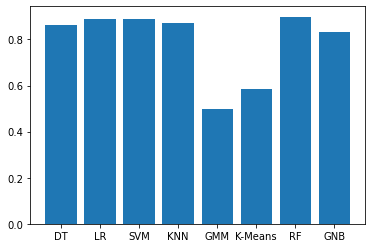

In [17]:
# Create a list of accuracies
accuracies = [DTaccuracy, LRaccuracy, SVaccuracy, KNNaccuracy, GMMaccuracy, KMaccuracy, RFaccuracy, GNBaccuracy]

# Create a list of models
models = ['DT','LR', 'SVM','KNN', 'GMM', 'K-Means', 'RF', 'GNB']

# Create a bar plot
plt.bar(models, accuracies)

# Show the plot
plt.show()

#   IMPLEMENTING BAGGING, BOOSTING AND STACKING ON THE BEST CLASSIFIER   

In [18]:
# Implementing bagging classifier with 10 trees
bagging = BaggingClassifier(RF, n_estimators=10)

# Fit the classifier to the training data
bagging.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging.predict(X_test)

# Compute the confusion matrix
confusion_matriX = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Bagging)")
print(confusion_matriX)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report (Bagging)")
print(report)

# Compute the accuracy score
baggingAccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy (Bagging):",baggingAccuracy)
print("")


Confusion Matrix (Bagging)
[[8776  181]
 [ 841  375]]

Report (Bagging)
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8957
         1.0       0.67      0.31      0.42      1216

    accuracy                           0.90     10173
   macro avg       0.79      0.64      0.68     10173
weighted avg       0.88      0.90      0.88     10173

Mean squared error: 0.10

Accuracy (Bagging): 0.8995379927258429



In [19]:
# Implementing AdaBoost classifier
boosting = AdaBoostClassifier(RF)

# Fitting the AdaBoost with training data
boosting.fit(X_train, y_train)

y_pred = boosting.predict(X_test)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix (Boosting)")
print(confusion_matrix)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("")
print("Report (Boosting)")
print(report)

# Compute the accuracy score
Boostingaccuracy = accuracy_score(y_test, y_pred)

# Print the mean squared error
print(f'Mean squared error: {mse:.2f}')

# Print the accuracy score
print("")
print("Accuracy (Boosting):",Boostingaccuracy)



Confusion Matrix (Boosting)
[[8774  183]
 [ 841  375]]

Report (Boosting)
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      8957
         1.0       0.67      0.31      0.42      1216

    accuracy                           0.90     10173
   macro avg       0.79      0.64      0.68     10173
weighted avg       0.88      0.90      0.88     10173

Mean squared error: 0.10

Accuracy (Boosting): 0.899341393885776


In [22]:
# Create the base classifiers
clf1 = RF

# Create the stacking classifier
stacking = StackingClassifier(estimators=[('rf', clf1)], final_estimator=LogisticRegression())

# Fit the classifier to the training data
stacking.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking.predict(X_test)

# Compute the confusion matrix
# confusion_matrix = confusion_matrix(y_test, y_pred)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the confusion matrix
# print("Confusion Matrix")
# print(confusion_matrix)

# Compute the classification report
report = classification_report(y_test, y_pred)
print("")
print("Report (Stacking)")
print(report)
# Compute the accuracy score
stackingAccuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("")
print("Accuracy:", stackingAccuracy)



Report (Stacking)
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      8957
         1.0       0.63      0.41      0.50      1216

    accuracy                           0.90     10173
   macro avg       0.78      0.69      0.72     10173
weighted avg       0.89      0.90      0.89     10173


Accuracy: 0.9006192863462106


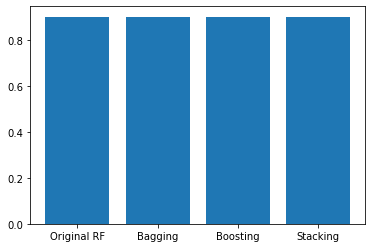

In [23]:
# Create a list of accuracies
accuracies = [RFaccuracy, baggingAccuracy,Boostingaccuracy, stackingAccuracy]

# Create a list of models
models = ['Original RF','Bagging','Boosting','Stacking']

# Create a bar plot
plt.bar(models, accuracies)

# Show the plot
plt.show()

In [24]:
RFpred
RFpred = RFpred.replace({0.0: 'No', 1.0: 'Yes'})

OriginalY = y_train
OriginalY = OriginalY.replace({0.0: 'No', 1.0: 'Yes'})

print("Is Churn Possible? (Original)")
print(OriginalY.value_counts())
print("")

print("Is Churn Possible? (Predited)")
print(RFpred.value_counts())

Is Churn Possible? (Original)
No     20984
Yes     2751
Name: target, dtype: int64

Is Churn Possible? (Predited)
No     9552
Yes     621
dtype: int64
